# Overview
The **LogLinearizer** package generates symbolic log-linearized representations of dynamic nonlinear equations using a first-order Taylor Series approximation.
The tool is designed with macroeconomic DSGE models in mind, and supports the DYNARE notation.
However, while DYNARE _solves_ the model, this package focuses on providing the symbolic linearized equations, which are often helpful in driving intuition.

# How to use the LogLinearization package
There are two ways to use this package. 
The first method assumes that you have a fully built out DYNARE mod file.
This means, for each variable and each parameter, the file provides a TeX representation, steady state values and so on.
The second method is based on providing the necessary dictionaries to the package separately, and is more convenient when you only have a couple of equations to log-linearize.
Below, I provide examples and use cases for each method.

## Option 1: Using a .mod file
For this method, I assume that you have a fully written out .mod file available with the DYNARE code fully written out.
For best results, this .mod file should have the following features:
1. Defined TeX representations for each variable and parameter defined in the file, like so
``` 
var C   ${C}$
    Pi  ${\Pi}$
    A   ${A}$
    ...
    
parameters  alppha  ${\alpha}$
            betta   ${\beta}$
            ...
                
```
This allows the resulting log-linearized equations to look like LaTeX output.
In the absence of these TeX representations, the package uses the name of the variable/parameter directly, but this ends up representing percentage deviations of inflation from its steady state as $\hat{Pi}$ instead of $\hat{\Pi}$, which is worse looking.

2. A defined `steady_state_model` block
Providing steady state values for some of the variables helps the simplification process enormously and makes the end result look cleaner.
Even if you don't have the steady state fully derived, if you have some specific steady state values, you should provide those.
For example, if you are linearizing around a zero-inflation steady state, you gross inflation rate would be equal to 1. You should provide this value.
**IMPORTANT**: This package _log_-linearizes the equations in your model.
This means that the steady state values of your variables cannot be equal to zero (since $\log{0}$ is not defined).
If you have variables taking on a steady-state value of zero, redefine the variable to be equal to 1.
For example, rather than use a net inflation rate $\pi$ of zero, use a gross inflation rate $\Pi = 1 + \pi$ with a steady-state value of 1.

### Generating the log-linearized equations
For this tutorial, I will use a [(]simple NK model](https://github.com/JohannesPfeifer/DSGE_mod/blob/master/Gali_2008/Gali_2008_chapter_2.mod) with capital from Johannes Pfeifer's excellent collection of DSGE models in DYNARE.
Start by importing this file from wherever you have saved it.

In [1]:
import LogLinearization as ll

IPython console for SymPy 1.12 (Python 3.11.4-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



Next, call the `createModEconomy()` function on this file.
This returns two objects: (1) a `ModEconomy` object which contains variables, parameters and steady-state values and their dynamic representations, and (2) a list of `Equation` objects that represent the equations of the model.

In [2]:
nk, eqns = ll.createModEconomy('SimpleNK.mod')

`nk` here is the `ModEconomy` object, while eqns is a `list` containing the `Equation` objects.
To generate the log-linearized versions of these equations, I use the `loglin()` method of the Equation objects:

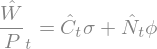

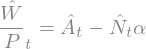

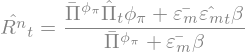

In [8]:
for eqn in eqns[:6]:
    display(eqn.loglin())

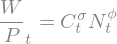

In [7]:
eqns[0].expr